<a href="https://colab.research.google.com/github/soju1jan/modoo/blob/master/14_MNIST_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개
class Y : 5


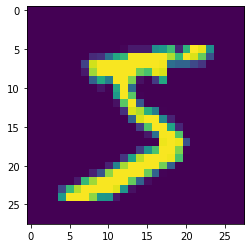

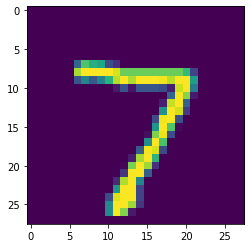

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [0]:
# ----------------------------------------------
#  MNIST 손글씨 인식하기: 데이터 전처리
# ----------------------------------------------
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
# import keras.utils
from keras import utils as np_utils
from keras.callbacks import ModelCheckpoint,EarlyStopping

import keras.utils
import tensorflow as tf
import matplotlib.pyplot as plt 
import sys, os
import numpy

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

# -- MNIST Dataset 70,000개 중 60,000개는 learning, 10,000개는 test
# -- 28 bytes X 28 = 784 Bytes
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 수: %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수: %d 개" % (X_test.shape[0]))

print("class Y : %d" % (Y_class_train[0])) 

# ---  X_train[0]에 저장된 이미지를 grey 옵션으로 흑백출력
# ---  None 옵션의 경우 color 출력
plt.imshow(X_train[0], cmap=None)
plt.show()
# plt.imshow(X_train[1], cmap='Greys')
plt.imshow(X_test[0],  cmap=None)
plt.show()

# 코드로 확인
for x in X_train[0]:
  for i in x:
    sys.stdout.write('%d\t' % i)
  sys.stdout.write('\n')


# ---- 데이터 정규화(normalization)
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

print("class : %d" % (Y_class_train[0])) # One Hot encoding 필요

# [5]를 -> [0,0,0,0,1,0,0,0,0,0] 이렇게 ..
Y_train = np_utils.to_categorical(Y_class_train,10)
Y_test = np_utils.to_categorical(Y_class_test,10)

print(Y_train[0])

# Deep learning 기본 프레임 만들기
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Model Compile
model.compile(loss='categorical_crossentropy',              
              optimizer='adam',              
              metrics=['accuracy'])

# 모델 저장 폴더 설정 => 구글 드라이브에 저장
MODEL_DIR = '/content/drive/My Drive/10_colab_dataset/model3/'
if not os.path.exists(MODEL_DIR): 
  os.mkdir(MODEL_DIR)

# # 모델 업데이트 및 저장
modelpath="/content/drive/My Drive/10_colab_dataset/model3/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


# 샘플 200개를 모두 30번 실행하게끔 설정
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))
